In [80]:
import numpy as np
import pandas as pd
import os


import matplotlib.pyplot as plt
import seaborn as sb
color = sb.color_palette()
import matplotlib as mpl

%matplotlib inline

from sklearn import preprocessing as pp 
from scipy.stats import pearsonr 
from sklearn import linear_model
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score


In [81]:
#Read Excel data provided. Read the first tab.
current_path = os.getcwd()
file = '/datasets/ActivatedInsights/ActivatedInsight.xlsx'
data1 = pd.read_excel(current_path + file)

#Read the third tab for the May 2019 data.
dataN1 = pd.read_excel(current_path + file, sheet_name = 2)


In [82]:
#First two rows are excel column names that only exists for some columns. Remove them for now.
#Also some of the last few rows have no data in most columns.
data2 = data1.iloc[2:-13]
dataN2 = dataN1.iloc[2:-13]

#Columns containing Tenure months for the GM, Chef, Sales, Office Managers (some missing values)
TenureMonth = data2.iloc[:,[6,8,10,12]]
TenureMonthN = dataN2.iloc[:,[6,8,10,12]]

# dataX will be just the Questionare answers
dataX = data2.iloc[:,13:]
dataNX = dataN2.iloc[:,13:]

# dataY will be just the occupany column
dataY = data2.iloc[:,3]
dataNY = dataN2.iloc[:,3]

#LocationCode will contain the column for the location code
LocationCode = data2.iloc[:,2]
LocationCodeN = dataN2.iloc[:,2]#Newer time point has one less location.

# TurnOver will be contain the turn over rate
TurnOver = data2.iloc[:,4]
TurnOverN = dataN2.iloc[:,4]

In [83]:
#Change the data type to float (from object).
dataY2=(pd.to_numeric(dataY, errors='coerce'))
#Reindex.
dataY2=dataY2.reset_index(drop=True)

LocationCode2=(pd.to_numeric(LocationCode, errors='coerce'))
LocationCode2=LocationCode2.reset_index(drop=True)

TurnOver2=(pd.to_numeric(TurnOver, errors='coerce'))
TurnOver2=TurnOver2.reset_index(drop=True)


#Same for the new time point.
dataNY2=(pd.to_numeric(dataNY, errors='coerce'))
dataNY2=dataNY2.reset_index(drop=True)

LocationCodeN2=(pd.to_numeric(LocationCodeN, errors='coerce'))
LocationCodeN2=LocationCodeN2.reset_index(drop=True)

TurnOverN2=(pd.to_numeric(TurnOverN, errors='coerce'))
TurnOverN2=TurnOverN2.reset_index(drop=True)

In [84]:
#Change the data type to float for the Employee Answers
dataX2 = pd.DataFrame().reindex_like(dataX)

#Try to run a for loop to change each column to float type
for index in range(dataX.shape[1]):
   
   # Select column by index position using iloc[]
    dataX2.iloc[:,index] = (pd.to_numeric(dataX.iloc[:,index], errors='coerce'))
#Reset the index
dataX2=dataX2.reset_index(drop=True)

#Same for the new time point.
dataNX2 = pd.DataFrame().reindex_like(dataNX)

#Try to run a for loop to change each column to float type
for index in range(dataNX.shape[1]):
   
   # Select column by index position using iloc[]
    dataNX2.iloc[:,index] = (pd.to_numeric(dataNX.iloc[:,index], errors='coerce'))
dataNX2=dataNX2.reset_index(drop=True)


In [85]:
#Do the same for the Tenure data frame.
TenureMonth2 = pd.DataFrame().reindex_like(TenureMonth)

#Try to run a for loop to change each column to float type
for column in range(TenureMonth.shape[1]):
   
   # Select column by index position using iloc[]
    TenureMonth2.iloc[:,column] = (pd.to_numeric(TenureMonth.iloc[:,column], errors='coerce'))
    
#Do the same for the new time point.
TenureMonthN2 = pd.DataFrame().reindex_like(TenureMonthN)

#Try to run a for loop to change each column to float type
for column in range(TenureMonthN.shape[1]):
   
   # Select column by index position using iloc[]
    TenureMonthN2.iloc[:,column] = (pd.to_numeric(TenureMonthN.iloc[:,column], errors='coerce'))

In [86]:
# Read csv for the median income (this is the newest data and we don't have yearly)
file = '/datasets/ActivatedInsights/ACS175YRS1903.csv'
IncomeData = pd.read_csv(current_path + file, header=1)

In [87]:
# Read the sheet for the location code to zip code mapping. This is the same for all time points.
current_path = os.getcwd()
file = '/datasets/ActivatedInsights/ActivatedInsight.xlsx'
CodeToZip = pd.read_excel(current_path + file, sheet_name = 5, header = 1)

In [88]:
#Convert to the integer?
#make the CotdeToZipNumeric the same size
CodeToZipNumeric = pd.DataFrame().reindex_like(CodeToZip)

#Try to run a for loop to change each column to float type
for index in range(CodeToZip.shape[1]):
   
   # Select column by index position using iloc[]
    CodeToZipNumeric.iloc[:,index] = (pd.to_numeric(CodeToZip.iloc[:,index], errors='coerce'))



In [89]:
#Rename the column for the mdian income
IncomeData.rename(columns={'Median income (dollars); Estimate; Households': 'MedianIncome'}, inplace=True)

#GO through all the location data and make an array that contains the median income.

#make a new series with same shape as LocationCode. This will contain Median Income Data
#MedianIncomeData = pd.DataFrame().reindex_like(dataY3)
RowIndex1=range(LocationCode2.shape[0])
MedianIncomeData = pd.DataFrame(columns=['MedianIncomeForZip'], index=RowIndex1)
 
#for loop to get the Median income for each location's zip code.
for row in range(LocationCode2.shape[0]):
    
    ZipCode=CodeToZip.loc[CodeToZip['Code'] == LocationCode2[row],:]
    #Zip Code actually is a big list of all the rows that had the location code.
    #They should all point to the same zip code (in the second column) so chose the top one.
    ZipCodeSelect=ZipCode.iloc[0,1]
    
    #Get the value for the median income corresponding to the ZipCodeSelect
    MedianIncomeValue1 = IncomeData.loc[ IncomeData['Id2'] == ZipCodeSelect , 'MedianIncome' ]
    #make it numeric
    MedianIncomeValue2=pd.to_numeric(MedianIncomeValue1, errors='coerce')
    #need to figure out why I need to specify the value instead of the index-value pair
    MedianIncomeData.iloc[row]=MedianIncomeValue2.iloc[0]
   
   
    # Select column by index position using iloc[]
   # dataX3.iloc[:,index] = (pd.to_numeric(data2.iloc[:,index], errors='coerce'))

In [90]:
#This is for the Tenure month at the first time point. Not sure if we should take a difference or not
#Most of the location should see a 12 month increase, except for locations where there were change.

TenureMonth2.describe()
#we notice that there are some missing values. It's probably best to take the median and replace with it.

,Unnamed: 6,Unnamed: 8,Unnamed: 10,Unnamed: 12
count,250.000000,238.000000,245.000000,241.000000
mean,32.404000,54.441176,23.118367,33.004149
std,32.775505,62.580671,24.281104,34.692038
min,0.000000,0.000000,0.000000,0.000000
25%,7.000000,10.000000,5.000000,9.000000
50%,16.000000,30.000000,13.000000,19.000000
75%,53.750000,78.750000,37.000000,46.000000
max,147.000000,325.000000,113.000000,210.000000


In [91]:
#This is for the Tenure month at the second time point. Not sure if we should take a difference or not
#Most of the location should see a 12 month increase, except for locations where there were change.
#We have one extra row
TenureMonthN2=TenureMonthN2[:-1]
TenureMonthN2.describe()
#we notice that there are some missing values. It's probably best to take the median and replace with it.

,Unnamed: 6,Unnamed: 8,Unnamed: 10,Unnamed: 12
count,247.000000,244.000000,247.000000,238.000000
mean,34.319838,55.102459,25.639676,32.693277
std,34.135415,60.621963,25.559188,37.175863
min,0.000000,0.000000,0.000000,0.000000
25%,11.000000,14.000000,7.000000,7.000000
50%,21.000000,30.500000,16.000000,21.000000
75%,51.500000,77.500000,35.500000,44.000000
max,158.000000,337.000000,107.000000,221.000000


In [92]:
#Check where the missing values are.
TenureMonth2.loc[(TenureMonth2['Unnamed: 6'].isnull()) |
              (TenureMonth2['Unnamed: 8'].isnull()) |
              (TenureMonth2['Unnamed: 10'].isnull()) |
              (TenureMonth2['Unnamed: 12'].isnull())]

,Unnamed: 6,Unnamed: 8,Unnamed: 10,Unnamed: 12
6,13.0,36.0,66.0,NaN
31,14.0,80.0,7.0,NaN
35,138.0,NaN,14.0,12.0
41,34.0,29.0,37.0,NaN
43,61.0,21.0,NaN,7.0
46,24.0,137.0,0.0,NaN
49,79.0,127.0,NaN,13.0
51,92.0,12.0,NaN,32.0
53,49.0,10.0,NaN,43.0
54,0.0,NaN,4.0,27.0


In [93]:
#Check where the missing values are. Same for second time point
TenureMonthN2.loc[(TenureMonthN2['Unnamed: 6'].isnull()) |
              (TenureMonthN2['Unnamed: 8'].isnull()) |
              (TenureMonthN2['Unnamed: 10'].isnull()) |
              (TenureMonthN2['Unnamed: 12'].isnull())]

,Unnamed: 6,Unnamed: 8,Unnamed: 10,Unnamed: 12
6,25.0,47.0,77.0,NaN
17,21.0,287.0,NaN,2.0
34,7.0,NaN,NaN,9.0
36,8.0,NaN,56.0,7.0
41,46.0,41.0,NaN,22.0
45,133.0,33.0,15.0,NaN
57,NaN,63.0,59.0,9.0
63,23.0,102.0,NaN,8.0
83,27.0,76.0,36.0,NaN
85,8.0,9.0,0.0,NaN


In [94]:
#Replace the missing data for Tenure of GM with median values.
MedianTenureGM = TenureMonth2.loc[:,'Unnamed: 6'].median()

TenureMonth2.loc[(TenureMonth2.loc[:,'Unnamed: 6'].isnull())] = MedianTenureGM

In [95]:
#Replace the chef, sales leader, and office manager's missing tenure with their median
MedianTenureChef = TenureMonth2.loc[:,'Unnamed: 8'].median()
MedianTenureSales = TenureMonth2.loc[:,'Unnamed: 10'].median()
MedianTenureOffice = TenureMonth2.loc[:,'Unnamed: 12'].median()


TenureMonth2.loc[(TenureMonth2.loc[:,'Unnamed: 8'].isnull())] = MedianTenureChef
TenureMonth2.loc[(TenureMonth2.loc[:,'Unnamed: 10'].isnull())] = MedianTenureSales
TenureMonth2.loc[(TenureMonth2.loc[:,'Unnamed: 12'].isnull())] = MedianTenureOffice

In [96]:
#Do the same for the second time point.

#Replace the missing data for Tenure of GM with median values.
MedianTenureGMN = TenureMonthN2.loc[:,'Unnamed: 6'].median()
#Replace the chef, sales leader, and office manager's missing tenure with their median
MedianTenureChefN = TenureMonthN2.loc[:,'Unnamed: 8'].median()
MedianTenureSalesN = TenureMonthN2.loc[:,'Unnamed: 10'].median()
MedianTenureOfficeN = TenureMonthN2.loc[:,'Unnamed: 12'].median()

TenureMonthN2.loc[(TenureMonthN2.loc[:,'Unnamed: 6'].isnull())] = MedianTenureGMN
TenureMonthN2.loc[(TenureMonthN2.loc[:,'Unnamed: 8'].isnull())] = MedianTenureChefN
TenureMonthN2.loc[(TenureMonthN2.loc[:,'Unnamed: 10'].isnull())] = MedianTenureSalesN
TenureMonthN2.loc[(TenureMonthN2.loc[:,'Unnamed: 12'].isnull())] = MedianTenureOfficeN

''

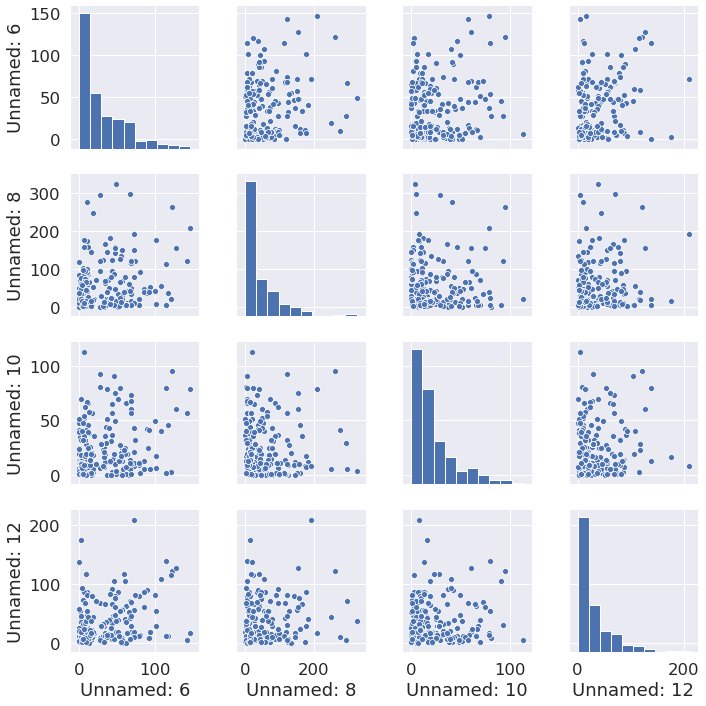

In [97]:
#Tenure monthes are extrenely poistively skewed. May be log (x+1) transform?
sb.pairplot(TenureMonth2)
;

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb6f4ecbe10>]],
      dtype=object)

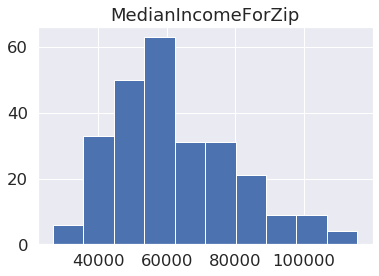

In [98]:
#Median income is also poistively skewed.
MedianIncomeData.hist()

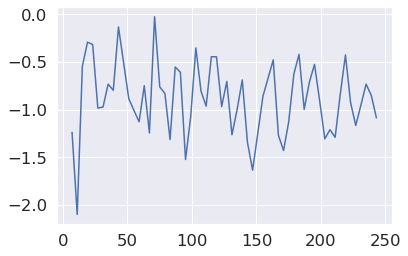

In [99]:
#Employee response featres are all negatively skewed.
skewValue = dataX2.skew(axis=0)
sb.lineplot(data=skewValue)

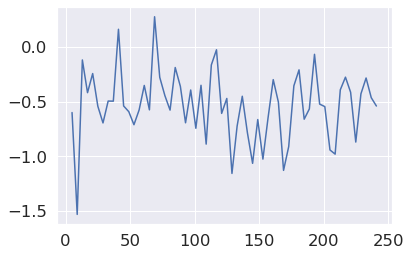

In [100]:
#For the second time point. Slightly less negatively skewed?
skewValueN = dataNX2.skew(axis=0)
sb.lineplot(data=skewValueN)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb6f4fc9358>,
      dtype=object)

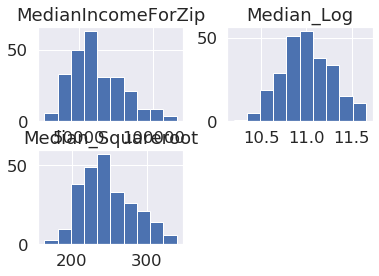

In [101]:
#MedianIncomeData is positively skewed.
#Apply sqrt
MedianIncomeData['Median_Squareroot']=MedianIncomeData['MedianIncomeForZip']**(1/2)
#Take log
MedianIncomeData['Median_Log']=np.log(MedianIncomeData['MedianIncomeForZip'])
MedianIncomeData.hist()

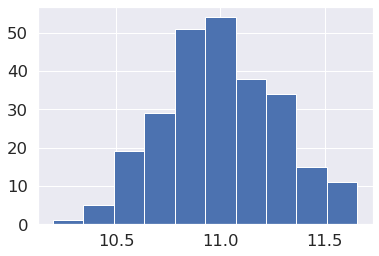

In [102]:
#Save the hisogram for the log transformed median income.
sb.set(font_scale=1.5)
sns_plot = MedianIncomeData.iloc[:,2].hist()
sns_plot.figure.savefig("MedianIncomeLog.png")

In [103]:
#Try to see just the difference for now.

#LocationCode2 contains the locations in the order of the 1st sheet.
#Go through the net time point data and find the corresponding row and subtract the
#first time point data from the second time point data.


#First merge the Occupancy rate and turn over.
#dataY2 and dataNY2 contains the occupancy.
#DataX2 and dataNX2 contains the answers.
#We know that the new time point has one less location.


OccupancyTurnover=pd.concat([dataY2, TurnOver2, LocationCode2], axis=1)
OccupancyTurnover = OccupancyTurnover.rename(columns={"Unnamed: 3": "occupancy", "Unnamed: 4": "turnOver", "Unnamed: 2": "LocationCode"})
OccupancyTurnover = OccupancyTurnover.reset_index(drop = True)

OccupancyTurnoverN=pd.concat([dataNY2, TurnOverN2, LocationCodeN2], axis=1)
OccupancyTurnoverN = OccupancyTurnoverN.rename(columns={"Unnamed: 3": "occupancy", "Unnamed: 4": "turnOver"})
OccupancyTurnoverN = OccupancyTurnoverN.reset_index(drop = True)

#Make a new dataframe for the difference of the occupancy and turn over rate.
OccupancyTurnoverDiff = pd.DataFrame().reindex_like(OccupancyTurnover)
OccupancyTurnoverDiff.loc[:,'LocationCode']=LocationCodeN2

#We have one less location for the new time point so go through the new location code.
for row in range(LocationCodeN2.shape[0]-1):
    
    #Difference in occupancy rate
    DiffValue = OccupancyTurnoverN.loc[row,'occupancy']-OccupancyTurnover.loc[OccupancyTurnover['LocationCode']==LocationCodeN2[row],'occupancy']
    OccupancyTurnoverDiff.loc[row,'occupancy'] = DiffValue.iloc[0]
    DiffValue2 = OccupancyTurnoverN.loc[row,'turnOver']-OccupancyTurnover.loc[OccupancyTurnover['LocationCode']==LocationCodeN2[row],'turnOver']
    OccupancyTurnoverDiff.loc[row,'turnOver'] = DiffValue2.iloc[0]

#Remove the last row because it won't have data
OccupancyTurnoverDiff=OccupancyTurnoverDiff.iloc[:-1]

In [104]:
#Need to go through the questionare answers too.
#Location order is slightly different so go each row at a time.
#Easiest to go through each column at a time as well.

#Rearrange the column names so we can subtract easily.
dataNX2.columns = range(dataNX2.shape[1])
dataX2.columns = range(dataX2.shape[1])

dataX2 = pd.concat([dataX2, LocationCode2], axis=1)
dataX2 = dataX2.rename(columns={"Unnamed: 2": "LocationCode"})

#Make a new dataframe for the difference in the answers to the questions.
dataXDiff = pd.DataFrame().reindex_like(dataNX2)

#We have one less location for the new time point so go through the new location code.
for row in range(LocationCodeN2.shape[0]-1):
    
    for columnIndex in range(dataNX2.shape[1]):
        
        #Difference in the answers
        DiffValueQA = dataNX2.iloc[row,columnIndex]-dataX2.loc[dataX2['LocationCode']==LocationCodeN2[row],columnIndex]
        dataXDiff.iloc[row,columnIndex] = DiffValueQA.iloc[0]
        #    dataXDiff.loc[row,:] = DiffValue.QA

#Remove the last row because it won't have data
dataXDiff=dataXDiff.iloc[:-1]

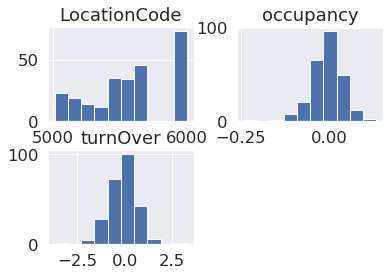

In [105]:
#test skewness, transform, and normalize the features
OccupancyTurnoverDiff.hist()
#Looks like the difference in the occupancy and turnover is normally distributed.
skewValueDiff = dataXDiff.skew(axis=0)
sb.lineplot(data=skewValueDiff)


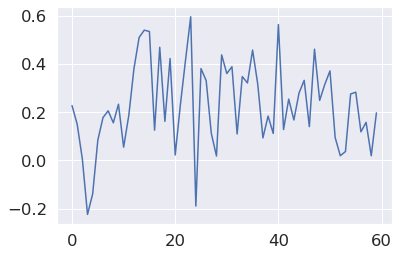

In [106]:
skewValueDiff = dataXDiff.skew(axis=0)
sb.lineplot(data=skewValueDiff)
#Slight positive skew.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb6fcdc1550>,
      dtype=object)

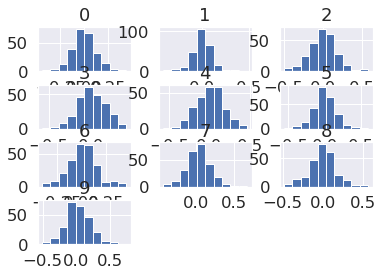

In [107]:
dataXDiff.iloc[:,0:10].hist()
#Just normalize both variables for now.

In [108]:
#Standarize
scalerOccupancyTurnoverDiff = pp.StandardScaler().fit(OccupancyTurnoverDiff)
OccupancyTurnoverDiffS = scalerOccupancyTurnoverDiff.transform(OccupancyTurnoverDiff)
OccupancyTurnoverDiffSDF=pd.DataFrame(data=OccupancyTurnoverDiffS)

scalerDataXDiff = pp.StandardScaler().fit(dataXDiff)
dataXDiffS = scalerDataXDiff.transform(dataXDiff)
dataXDiffSDF=pd.DataFrame(data=dataXDiffS)



In [109]:
TurnOverN2.head()

0    1.600284
1    0.393548
2    0.425249
3    1.747824
4    0.171429
Name: Unnamed: 4, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb7018527f0>,
      dtype=object)

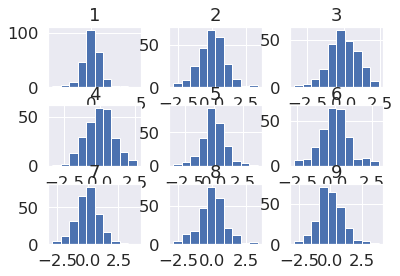

In [110]:
dataXDiffSDF.iloc[:,1:10].hist()

r^2 on test data : -0.012872
With Lasso's score function: -0.012872


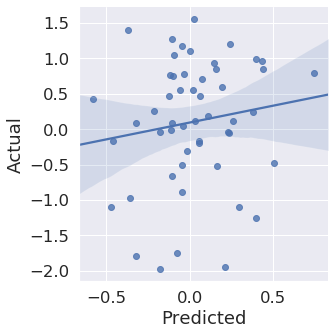

In [111]:
#Run lasso regression with just the features from the Questions.
#Now try lasso with all the featueres and see which one is left
#Specify the features and a target (turnover)
#Features3 = pd.concat([EmployeeResponseDF, MedianIncomeDataSDF.iloc[:,2], TenureMonthSDF], axis=1)


x1 = dataXDiffSDF
y1 = OccupancyTurnoverDiffSDF.iloc[:,1] #Turn over

#Split it 80 - 20 for now

X1_train, X1_test, Y1_train, Y1_test = train_test_split(x1, y1, test_size=0.2)

lasso1 = Lasso(alpha=0.04)
lasso1.fit(X1_train, Y1_train)

YpredLasso = lasso1.predict(X1_test)
r2ScoreLasso = r2_score(Y1_test, YpredLasso)
print("r^2 on test data : %f" % r2ScoreLasso)
r2ScoreLasso1=lasso1.score(X1_test, Y1_test)
print("With Lasso's score function: %f" % r2ScoreLasso1)
coeff_used = np.sum(lasso1.coef_!=0)

ActualPrediction1 = pd.DataFrame({'Actual': Y1_test, 'Predicted': YpredLasso})

sb.lmplot(x='Predicted', y='Actual', data=ActualPrediction1)

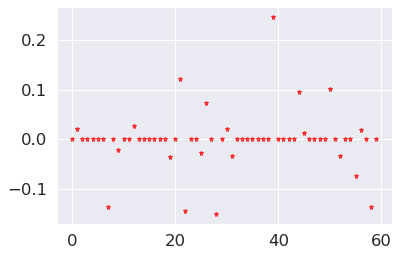

In [112]:
plt.plot(lasso1.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Lasso; $\alpha = 0.1$',zorder=7) 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb6f9b116d8>,
      dtype=object)

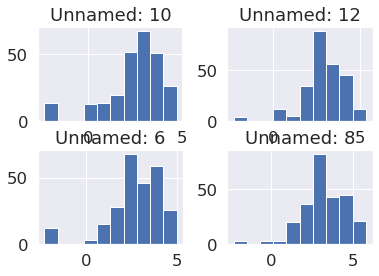

In [113]:
#We need to log transform the Tenure Month, add 0.1 so that we don't have to deal with the log of zero.
NewTenureMonth2=TenureMonth2+0.1
NewTenureMonth2Log=NewTenureMonth2.apply(np.log) # returns DataFrame
NewTenureMonth2Log.hist()

In [114]:
#Same for the second time point
#We need to log transform the Tenure Month, add 0.1 so that we don't have to deal with the log of zero.
NewTenureMonthN2=TenureMonthN2+0.1
NewTenureMonthN2Log=NewTenureMonthN2.apply(np.log) # returns DataFrame

In [115]:
#Now we have more or less normally distributed input variables.
#We have NewDataX3LogFlip for the employee response
#We have LogTurnover for the turnover rate.
#We have OccupancyLogFlip for the occupancy.
#We have MedianIncomeData['Median_Log']=np.log(MedianIncomeData['MedianIncomeForZip']) for Median Income Data
#We have NewTenureMonth3Log

scalerMedianIncomeData = pp.StandardScaler().fit(MedianIncomeData)
MedianIncomeDataS = scalerMedianIncomeData.transform(MedianIncomeData)
MedianIncomeDataSDF=pd.DataFrame(data=MedianIncomeDataS)

scalerTenureMonth = pp.StandardScaler().fit(NewTenureMonth2Log)
TenureMonthS = scalerTenureMonth.transform(NewTenureMonth2Log)
TenureMonthSDF=pd.DataFrame(data=TenureMonthS)

#Same for the second time point.
scalerTenureMonthN = pp.StandardScaler().fit(NewTenureMonthN2Log)
TenureMonthNS = scalerTenureMonthN.transform(NewTenureMonthN2Log)
TenureMonthNSDF=pd.DataFrame(data=TenureMonthNS)



In [116]:
#New time point has one less location. Match the standardized MedianIncomeData and TenureMonth to the new time point location

median_income_data2 = np.zeros((LocationCodeN2.shape[0]-1,1))
tenure_month_data2 = np.zeros((LocationCodeN2.shape[0]-1,4))

#We have one less location for the new time point so go through the new location code.
#We have one less location for the new time point so go through the new location code.
for row in range(LocationCodeN2.shape[0]-1):
    
    median_income_data2[row,0] = MedianIncomeDataSDF.loc[LocationCode2==LocationCodeN2[row],2]

    tenure_month_data2[row,:] = TenureMonthSDF.loc[LocationCode2==LocationCodeN2[row],:]

#Change to data frame.
tenure_month_data2DF = pd.DataFrame(data=tenure_month_data2)
median_income_data2DF = pd.DataFrame(data=median_income_data2)

In [117]:
#arrange dataX2 in the order of LocationCodeN2
dataX2_arranged = np.zeros((LocationCodeN2.shape[0]-1,dataX2.shape[1]))

for row in range(LocationCodeN2.shape[0]-1):
    
    dataX2_arranged[row,:] = dataX2.loc[LocationCode2==LocationCodeN2[row],:]

#Change to data frame.
dataX2_arrangedDF = pd.DataFrame(data=dataX2_arranged)


In [118]:
#Transform and standarize the new dataX2 and the y values.
#Questionare answers are mostly negatively skewed.
#For the DataX, because they are mostly negative, flip it by subtracting it from 1.1 and then use log transform.
#After that flip back again by subtracting it from another value.
#Take away the location code.
dataX2_arrangedDF=dataX2_arrangedDF.iloc[:,0:60]
NewDataX2=1.1-dataX2_arrangedDF
NewDataX2Log=NewDataX2.apply(np.log) # returns DataFrame
NewDataX2LogFlip=0.1-NewDataX2Log


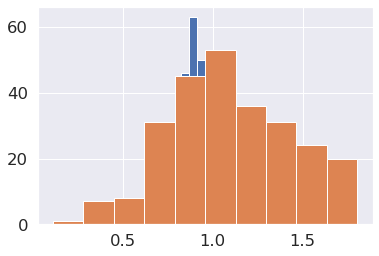

In [119]:
#Transform and normalize for the occupancy and turnover as well
#dataNY2 is occupancy, TurnOverN2 is turnover.

#For room occupancy.
dataNY2.hist()
#it's negatively skewed so flip, take log, then flip back.
dataY2Flip=1.1-dataNY2
dataY2Log=np.log(dataY2Flip)
OccupancyLogFlip=-0.5-dataY2Log
OccupancyLogFlip.hist()

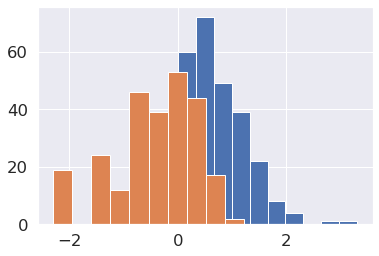

In [120]:
#looks like the Turnover should be at least log transformed.
#Also add 0.1 because we don't want the zero turnover.
TurnOverN2.hist()
LogTurnover=np.log(TurnOverN2+0.1)
LogTurnover.hist()

In [121]:
#standardize all the variables.
#Standarize
scalerEmployeeResponse = pp.StandardScaler().fit(NewDataX2LogFlip)
EmployeeResponse = scalerEmployeeResponse.transform(NewDataX2LogFlip)
EmployeeResponseDF=pd.DataFrame(data=EmployeeResponse)

OccupancyTurnover=pd.concat([OccupancyLogFlip, LogTurnover], axis=1)

scalerOccupancyTurnover = pp.StandardScaler().fit(OccupancyTurnover)
OccupancyTurnoverS = scalerOccupancyTurnover.transform(OccupancyTurnover)
OccupancyTurnoverSDF=pd.DataFrame(data=OccupancyTurnoverS)
#Last row is NaN because 2nd time point data has one less location.
OccupancyTurnoverSDF = OccupancyTurnoverSDF[:-1]

In [122]:
OccupancyTurnoverSDF.tail()

,0,1
251,-0.024559,-0.464297
252,1.012098,0.149993
253,1.244716,0.283884
254,-2.372787,-0.126200
255,0.055708,-1.312600


r^2 on test data : 0.026178
With Lasso's score function: 0.026178


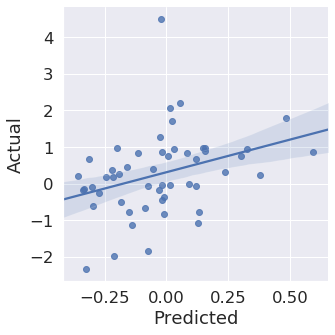

In [123]:
#Now try lasso with all the featueres and see which one is left
#Specify the features and a target (turnover)
#This is still with the difference in the questionare.
#Later try to predict with just the answer at time point 1 to predict the turnover next year
#which should be influenced by the current employee's satisfaction.
Features = pd.concat([dataXDiffSDF, median_income_data2DF, tenure_month_data2DF], axis=1)

x2 = Features
y2 = OccupancyTurnoverDiffSDF.iloc[:,1] #Turn over

#Split it 80 - 20 for now

X2_train, X2_test, Y2_train, Y2_test = train_test_split(x2, y2, test_size=0.2)

lasso2 = Lasso(alpha=0.05)
lasso2.fit(X2_train, Y2_train)

YpredLasso2 = lasso2.predict(X2_test)
r2ScoreLasso2 = r2_score(Y2_test, YpredLasso2)
print("r^2 on test data : %f" % r2ScoreLasso2)
r2ScoreLasso21=lasso2.score(X2_test, Y2_test)
print("With Lasso's score function: %f" % r2ScoreLasso21)
coeff_used = np.sum(lasso2.coef_!=0)

ActualPrediction2 = pd.DataFrame({'Actual': Y2_test, 'Predicted': YpredLasso2})

sb.lmplot(x='Predicted', y='Actual', data=ActualPrediction2)

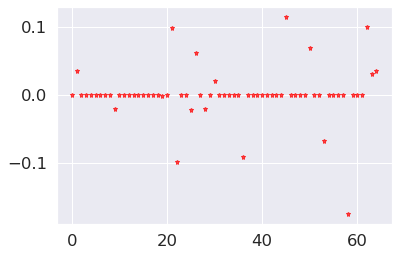

In [124]:
plt.plot(lasso2.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Lasso; $\alpha = 0.1$',zorder=7) 

r^2 on test data : 0.004408
With Lasso's score function: 0.004408


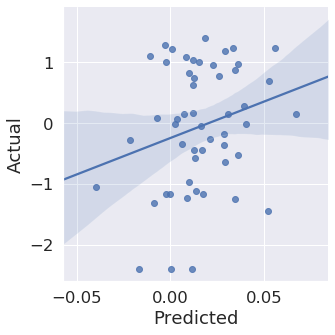

In [125]:
#Try to predict the future turn over with the present data.
Features = pd.concat([dataX2_arrangedDF, median_income_data2DF, tenure_month_data2DF], axis=1)

x3 = Features
y3 = OccupancyTurnoverSDF.iloc[:,1] #Turn over

#Split it 80 - 20 for now

X3_train, X3_test, Y3_train, Y3_test = train_test_split(x3, y3, test_size=0.2)

lasso3 = Lasso(alpha=0.07)
lasso3.fit(X3_train, Y3_train)

YpredLasso3 = lasso3.predict(X3_test)
r2ScoreLasso3 = r2_score(Y3_test, YpredLasso3)
print("r^2 on test data : %f" % r2ScoreLasso3)
r2ScoreLasso31=lasso3.score(X3_test, Y3_test)
print("With Lasso's score function: %f" % r2ScoreLasso31)
coeff_used = np.sum(lasso3.coef_!=0)

ActualPrediction3 = pd.DataFrame({'Actual': Y3_test, 'Predicted': YpredLasso3})

sb.lmplot(x='Predicted', y='Actual', data=ActualPrediction3)

In [126]:
#looks like it won't predict at all.
dataNX2.head()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,0.848485,0.909091,0.757576,0.727273,0.606061,0.787879,0.818182,0.812500,0.818182,0.636364,...,0.848485,0.848485,0.818182,0.636364,0.757576,0.727273,0.727273,0.727273,0.787879,0.818182
1,0.695652,0.875000,0.458333,0.458333,0.458333,0.625000,0.458333,0.333333,0.375000,0.541667,...,0.920000,0.800000,0.520000,0.458333,0.541667,0.666667,0.625000,0.560000,0.640000,0.640000
2,0.840000,0.880000,0.600000,0.720000,0.760000,0.760000,0.680000,0.800000,0.720000,0.720000,...,0.880000,1.000000,0.840000,0.720000,0.760000,0.800000,0.720000,0.680000,0.720000,0.958333
3,0.833333,0.833333,0.583333,0.541667,0.541667,0.833333,0.826087,0.666667,0.875000,0.565217,...,0.958333,0.916667,0.708333,0.739130,0.739130,0.875000,0.739130,0.869565,0.782609,0.833333
4,0.851852,0.851852,0.814815,0.851852,0.814815,0.814815,0.814815,0.851852,0.851852,0.481481,...,0.962963,0.925926,0.777778,0.777778,0.851852,0.814815,0.615385,0.888889,0.814815,0.962963


In [127]:
#try and see if the second time point is predicted as well as the first time point with the same model

#Transform and standarize the dataNX2 (data from the new time point).
#Questionare answers are mostly negatively skewed.
#For the DataX, because they are mostly negative, flip it by subtracting it from 1.1 and then use log transform.
#After that flip back again by subtracting it from another value.
#Remove the last row because it is NaN
dataNX2 = dataNX2[:-1]
NewDataNX2=1.1-dataNX2
NewDataNX2Log=NewDataNX2.apply(np.log) # returns DataFrame
NewDataNX2LogFlip=0.1-NewDataNX2Log

#Standardize
scalerEmployeeResponseN = pp.StandardScaler().fit(NewDataNX2LogFlip)
EmployeeResponseN = scalerEmployeeResponseN.transform(NewDataNX2LogFlip)
EmployeeResponseNDF=pd.DataFrame(data=EmployeeResponseN)

In [128]:
TenureMonthNSDF.tail()

,0,1,2,3
251,0.024706,0.615689,-1.474305,-0.095235
252,0.277221,-0.229135,0.569916,-1.396609
253,-0.213669,1.139584,-0.146060,0.112190
254,-0.716541,-1.338871,-0.550397,-1.396609
255,0.024706,-0.189848,0.275688,0.180247


r^2 on test data : 0.057201
With Lasso's score function: 0.057201


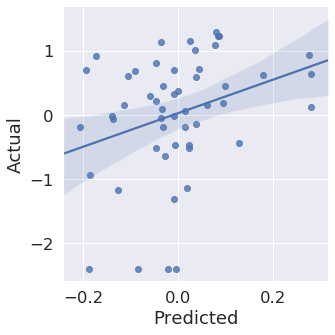

In [141]:
#Run the same model as the first time point using the second time point data
#Try to predict the future turn over with the present data.
Features = pd.concat([EmployeeResponseNDF, median_income_data2DF, TenureMonthNSDF], axis=1)

x4 = Features
y4 = OccupancyTurnoverSDF.iloc[:,1] #Turn over

#Split it 80 - 20 for now

X4_train, X4_test, Y4_train, Y4_test = train_test_split(x4, y4, test_size=0.2)

lasso4 = Lasso(alpha=0.15)
lasso4.fit(X4_train, Y4_train)

YpredLasso4 = lasso4.predict(X4_test)
r2ScoreLasso4 = r2_score(Y4_test, YpredLasso4)
print("r^2 on test data : %f" % r2ScoreLasso4)
r2ScoreLasso41=lasso4.score(X4_test, Y4_test)
print("With Lasso's score function: %f" % r2ScoreLasso41)
coeff_used = np.sum(lasso4.coef_!=0)

ActualPrediction4 = pd.DataFrame({'Actual': Y4_test, 'Predicted': YpredLasso4})

sb.lmplot(x='Predicted', y='Actual', data=ActualPrediction4)

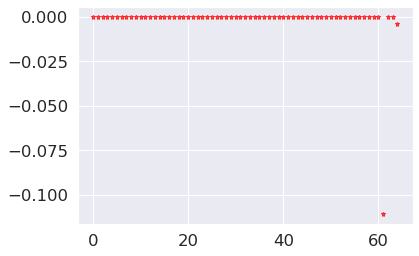

In [142]:
plt.plot(lasso4.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Lasso; $\alpha = 0.1$',zorder=7) 

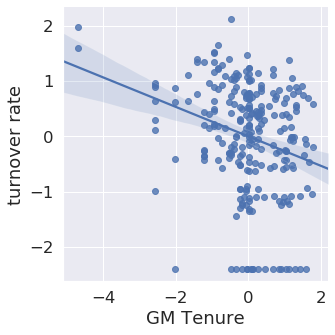

In [143]:
frameMVP = { 'turnover rate': y4, 'GM Tenure': Features.iloc[:,61] } 
dataForPlotMVP = pd.DataFrame(frameMVP)
# Recommended way
sb.lmplot(x='GM Tenure', y='turnover rate', data=dataForPlotMVP)


In [144]:
pearsonr(Features.iloc[:,61], y4)

(-0.26623266417079866, 1.5813250312143533e-05)